In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
pic=r"C:\Users\sobee\Desktop\UrbanSound8K\spectrograms"
categories=["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling","gun_shot","jackhammer","siren","street_music"]

In [3]:
imgs=[]

for category in categories:
    fl=os.path.join(pic,category)
    lbl=categories.index(category)
    for img in os.listdir(fl):
        img_path=os.path.join(fl,img)
        img_arr=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE) #grayscale
        img_arr=cv2.resize(img_arr,(128,128))
        imgs.append([img_arr,lbl])

In [4]:
len(imgs)

8732

In [5]:
imgs[1313]

[array([[255,   0,   0, ...,   0,   0,   0],
        [255,   0,   0, ...,   0,   0,   0],
        [255,   0,   0, ...,   0,   0,   0],
        ...,
        [255,  11,  36, ...,  66,  58,  45],
        [255,  27,  28, ...,  28,  28,  28],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 1]

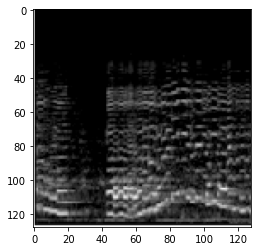

In [6]:
plt.imshow(img_arr,cmap="gray")
plt.show()

In [7]:
img_arr.shape

(128, 128)

In [8]:
x=[]
y=[]

for features,labels in imgs:
  x.append(features)
  y.append(labels)

In [9]:
print(type(x),type(y))

<class 'list'> <class 'list'>


In [10]:
x=np.array(x) #reshape(-1,128,128,1)
y=np.array(y)

In [11]:
print(x.shape)
print(y.shape)

(8732, 128, 128)
(8732,)


In [12]:
x=x.reshape(-1,128,128,1)
y=y.reshape(-1,1)
print(x.shape)
print(y.shape)

(8732, 128, 128, 1)
(8732, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [14]:
print(f"x_train: {len(x_train)}")
print(f"x_test: {len(x_test)}")

x_train: 7858
x_test: 874


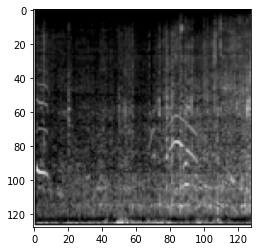

(128, 128, 1)


In [15]:
plt.imshow(x_test[151],cmap="gray")
plt.show()
print(x_test[151].shape)

In [16]:
x_val=x_train[6984:]
y_val=y_train[6984:]

x_train=x_train[:6984]
y_train=y_train[:6984]

In [17]:
print(f"x_train: {len(x_train)}")
print(f"x_val: {len(x_val)}")
print(f"x_test: {len(x_test)}")

x_train: 6984
x_val: 874
x_test: 874


In [18]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

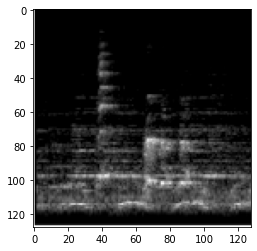

(128, 128, 1)


In [19]:
plt.imshow(x_val[550],cmap="gray")
plt.show()
print(x_val[550].shape)

In [20]:
pickle.dump(x_train,open("x_train.pkl","wb"))
pickle.dump(y_train,open("y_train.pkl","wb"))
pickle.dump(x_test,open("x_test.pkl","wb"))
pickle.dump(y_test,open("y_test.pkl","wb"))
pickle.dump(x_val,open("x_val.pkl","wb"))
pickle.dump(y_val,open("y_val.pkl","wb"))